In [113]:
import pandas as pd
import numpy as np
import os 
import glob
import matplotlib.pyplot as plt

## Run this notebook to get model ready data csv!

If needed, spesify what etfs from final_etf_csv you want to include!

**NOTE** 

This notebook creates the ultimate csv that is used by the model!

In [114]:
include_etf = [
    'FTSE EPRA Nareit Developed Europe TRI',
    'LPX50 Eur TR',
    'MSCI World Net Index EUR',
    'ICE BofA G0BC (Corporate World)', # Global IG 
    'FTSE EMU Government Bond (EGBI) TRI', 
    'ICE BofA HW00 (Global HY)'
]

In [115]:
folder_path = 'final_etf_csv'
merged_df = pd.DataFrame()

In [116]:
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

for file in csv_files:
    etf_name = os.path.splitext(os.path.basename(file))[0]
    
    df = pd.read_csv(file, index_col=0, parse_dates=True)
    
    if 'Price' in df.columns:
        merged_df[etf_name] = df['Price']

merged_df.index = pd.to_datetime(merged_df.index)


Reversing

In [117]:
merged_df = merged_df.iloc[::-1]

Excluding spesified columns

In [118]:
merged_df = merged_df[include_etf]

In [119]:
merged_df.head()

,FTSE EPRA Nareit Developed Europe TRI,LPX50 Eur TR,MSCI World Net Index EUR,ICE BofA G0BC (Corporate World),FTSE EMU Government Bond (EGBI) TRI,ICE BofA HW00 (Global HY)
Date,,,,,,
2004-11-10,NaN,NaN,NaN,164.586,133.6821,141.893
2004-11-11,NaN,NaN,NaN,164.748,134.0548,141.934
2004-11-12,NaN,NaN,NaN,165.151,134.3564,142.101
2004-11-15,NaN,936.23,96.170,165.283,134.4309,142.284
2004-11-16,NaN,941.21,95.452,165.274,134.5997,142.366


In [120]:
def plot_each(merged_df):
    for etf_name in merged_df.columns:
        plt.figure(figsize=(10, 6))
        plt.plot(merged_df.index, merged_df[etf_name], label=etf_name)
        plt.title(f"Price Time Series for {etf_name}")
        plt.xlabel("Date")
        plt.ylabel("Price")
        plt.legend(loc="best")
        plt.grid(True)
        plt.show()


## Plotting For Each Asset For Good Measure

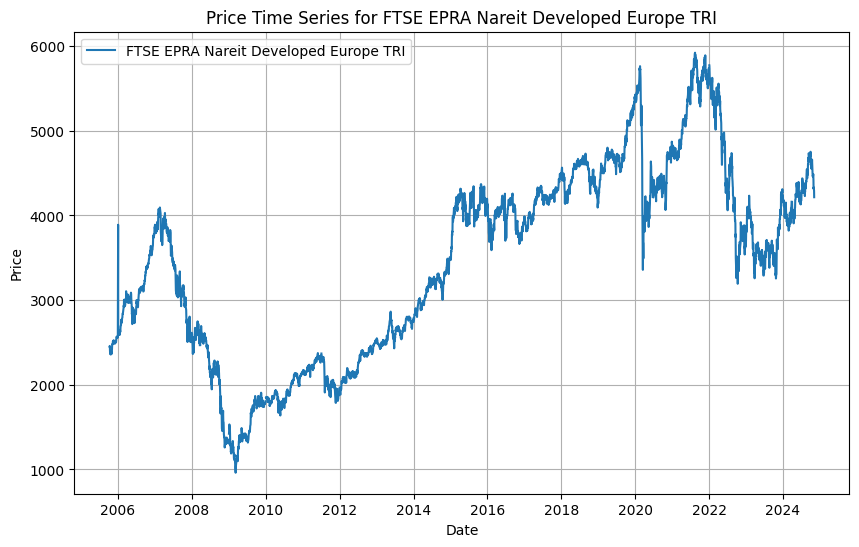

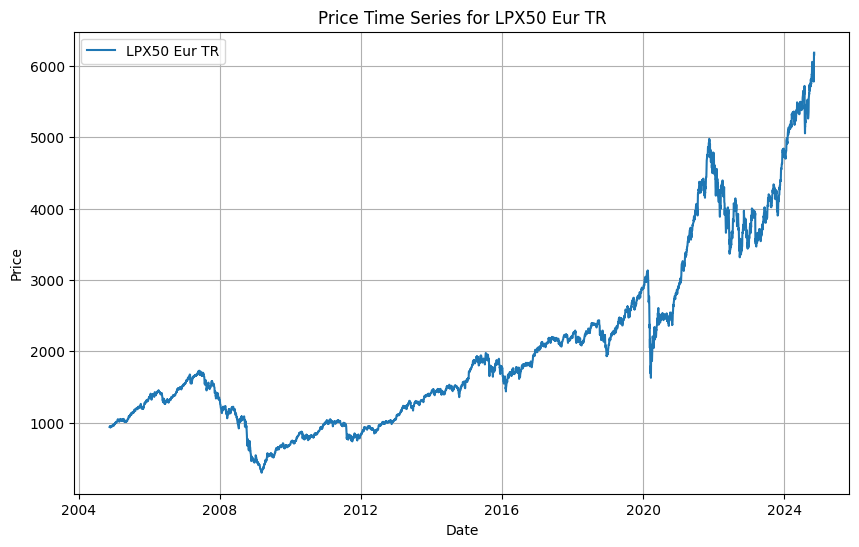

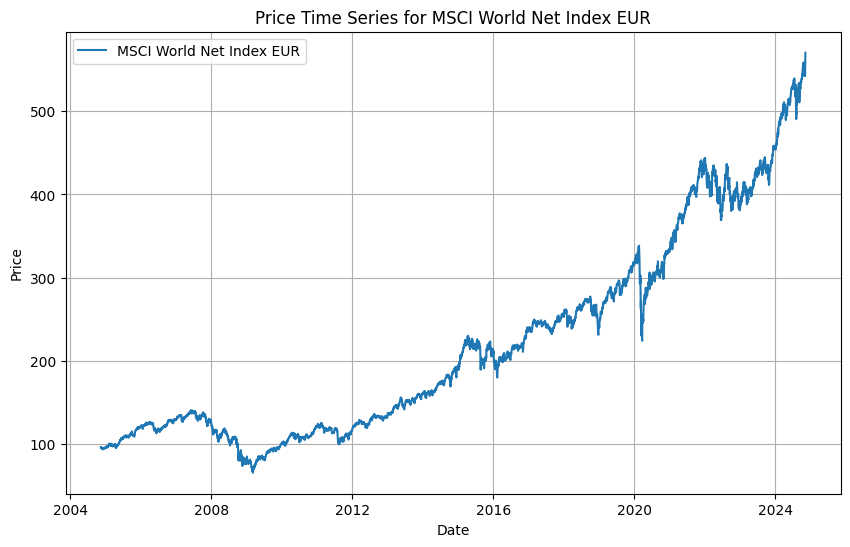

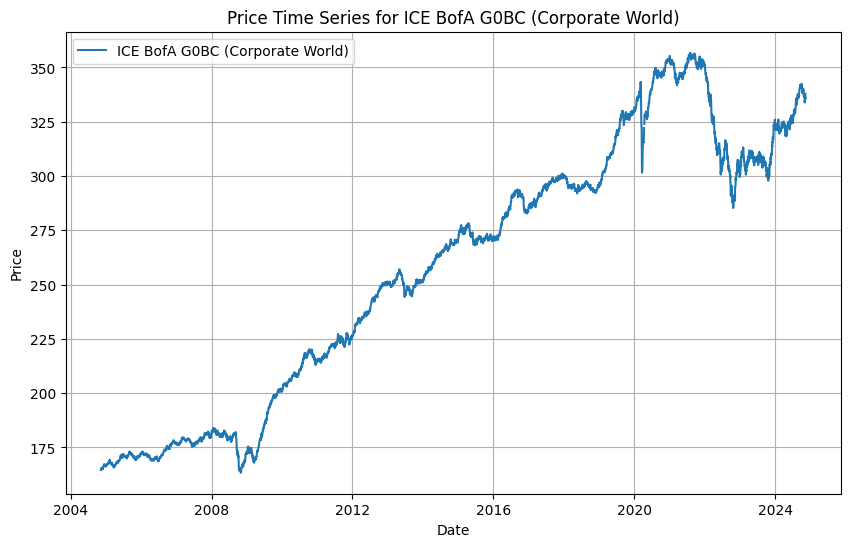

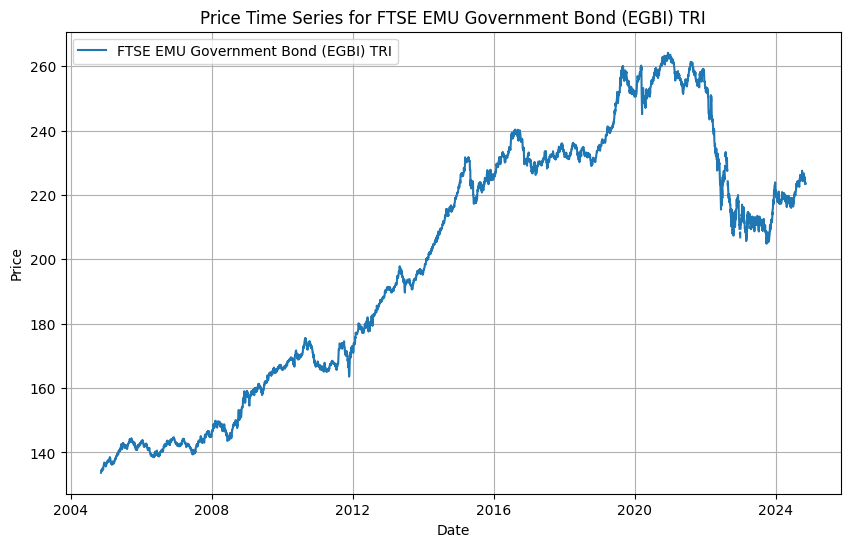

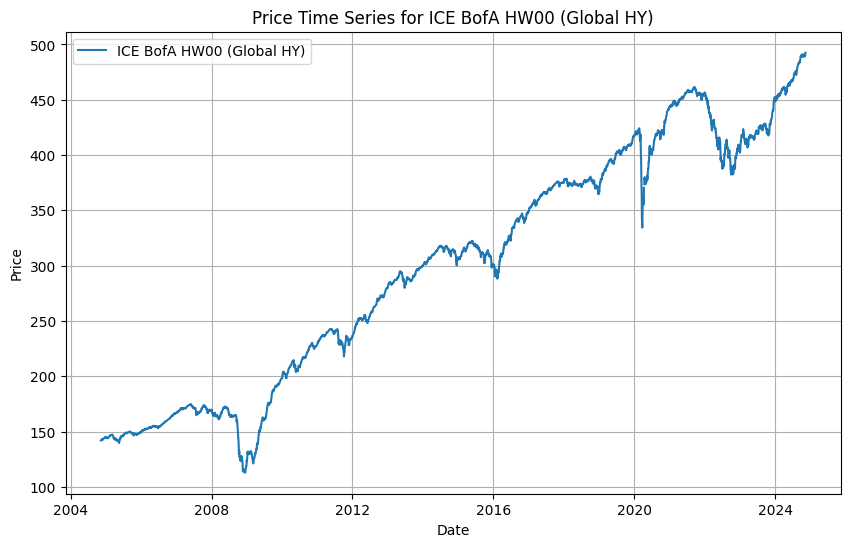

In [121]:
plot_each(merged_df)

## Plotting Everything Together

In [122]:
def all_in_one_plot(df):
    plt.figure(figsize=(12, 8))

    for column in df.columns:
        plt.plot(df.index, df[column], label=column)

    plt.title('Time Series of Various Financial Indicators')
    plt.xlabel('Date')
    plt.ylabel('Value')

    plt.legend(loc="best")

    plt.show()

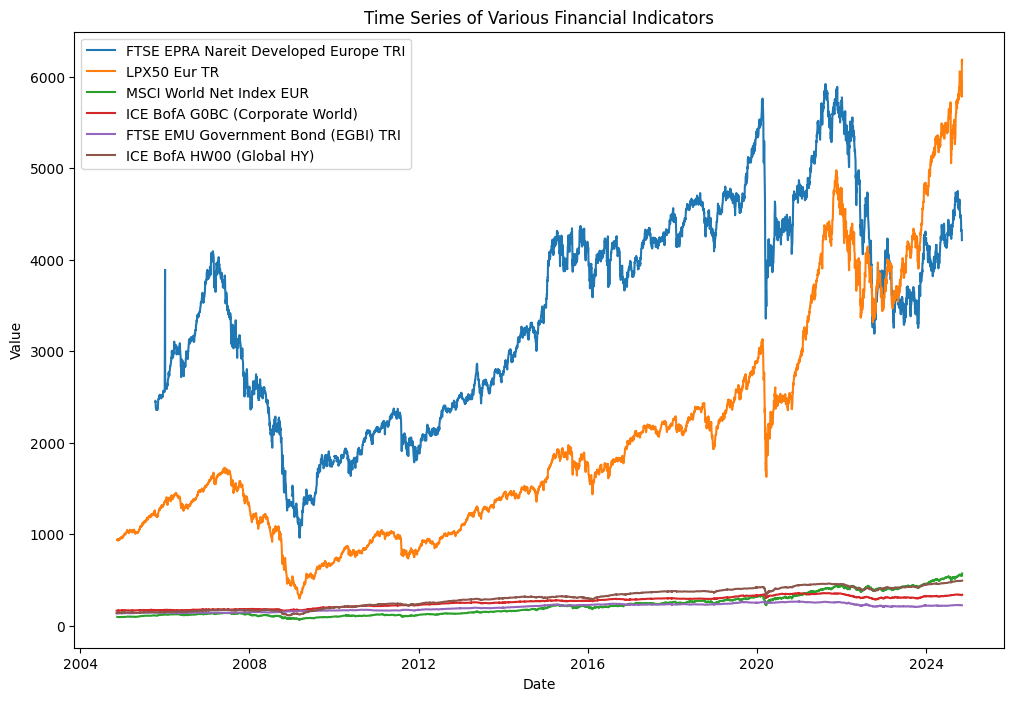

In [123]:
all_in_one_plot(merged_df)

In [124]:
# Find the earliest date where there is data in all columns (no NaNs)
earliest_date_with_data = merged_df.dropna().index.min()

# Filter the DataFrame to keep only rows from this earliest date onwards
merged_df = merged_df[merged_df.index >= earliest_date_with_data]

# Display the earliest date with complete data and the filtered DataFrame
print(f"Earliest date with complete data: {earliest_date_with_data}")
merged_df.head()


Earliest date with complete data: 2005-10-10 00:00:00


,FTSE EPRA Nareit Developed Europe TRI,LPX50 Eur TR,MSCI World Net Index EUR,ICE BofA G0BC (Corporate World),FTSE EMU Government Bond (EGBI) TRI,ICE BofA HW00 (Global HY)
Date,,,,,,
2005-10-10,2450.95,1214.67,110.969,171.392,143.3913,148.214
2005-10-11,2458.87,1222.97,111.477,171.162,143.1166,147.610
2005-10-12,2450.14,1211.16,110.600,170.716,142.8919,146.965
2005-10-13,2404.57,1198.21,110.665,170.318,142.4543,146.462
2005-10-14,2385.68,1200.09,110.334,170.222,142.4629,146.699


This plot shows after we cut to where all indicies have data

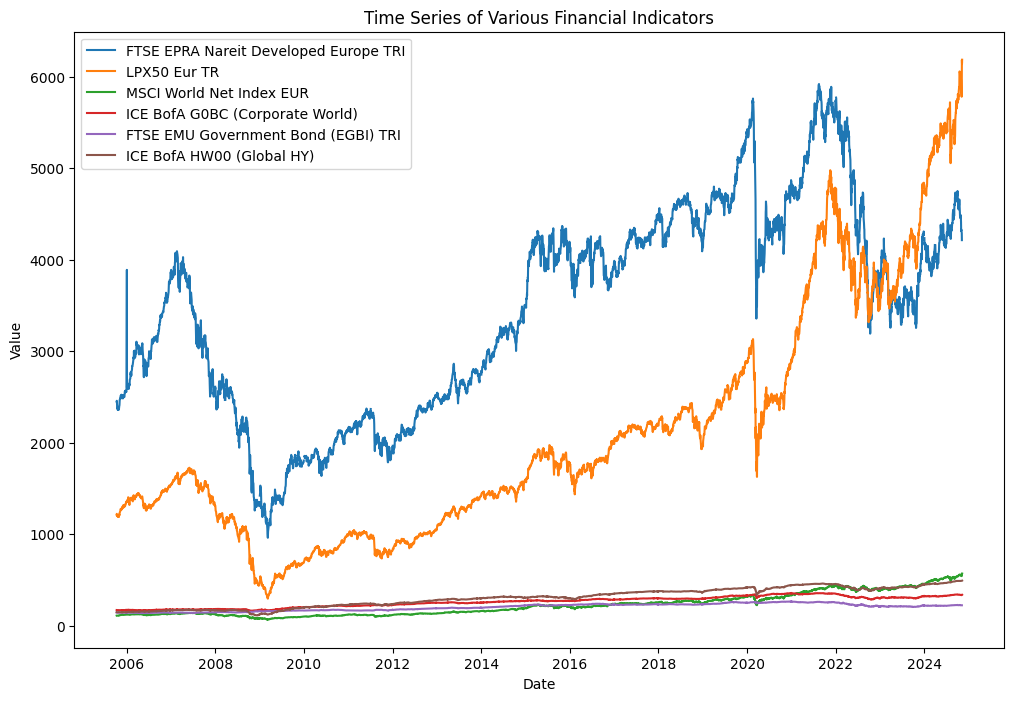

In [125]:
all_in_one_plot(merged_df)

In [126]:
#find earliest nan value for each column

earliest_nan = merged_df.isnull().idxmax()
earliest_nan

FTSE EPRA Nareit Developed Europe TRI   2006-12-25
LPX50PE                                 2005-10-10
MSCI World                              2024-11-07
ICE BofA G0BC (Corporate World)         2005-11-24
FTSE EMU Government Bond (EGBI) TRI     2005-12-26
ICE BofA HW00 (Global HY)               2005-11-24
MSCI World 2                            2005-10-10
dtype: datetime64[ns]

In [127]:
#find nan values

nan_values = merged_df.isna().sum()
print(nan_values)

FTSE EPRA Nareit Developed Europe TRI     42
LPX50PE                                    0
MSCI World                                 2
ICE BofA G0BC (Corporate World)          118
FTSE EMU Government Bond (EGBI) TRI       29
ICE BofA HW00 (Global HY)                118
MSCI World 2                               0
dtype: int64


In [128]:
starting_values = merged_df.iloc[0]

# Normalize each column by dividing all values by the starting value of that column
normalized_df = merged_df / starting_values

# Display the normalized DataFrame
print("Normalized DataFrame:")
normalized_df.head()

Normalized DataFrame:


,FTSE EPRA Nareit Developed Europe TRI,LPX50 Eur TR,MSCI World Net Index EUR,ICE BofA G0BC (Corporate World),FTSE EMU Government Bond (EGBI) TRI,ICE BofA HW00 (Global HY)
Date,,,,,,
2005-10-10,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2005-10-11,1.003231,1.006833,1.004578,0.998658,0.998084,0.995925
2005-10-12,0.999670,0.997110,0.996675,0.996056,0.996517,0.991573
2005-10-13,0.981077,0.986449,0.997260,0.993734,0.993465,0.988179
2005-10-14,0.973370,0.987997,0.994278,0.993174,0.993525,0.989778


In [129]:
nan_values = normalized_df.isna().sum()
print(nan_values)

FTSE EPRA Nareit Developed Europe TRI     42
LPX50PE                                    0
MSCI World                                 2
ICE BofA G0BC (Corporate World)          118
FTSE EMU Government Bond (EGBI) TRI       29
ICE BofA HW00 (Global HY)                118
MSCI World 2                               0
dtype: int64


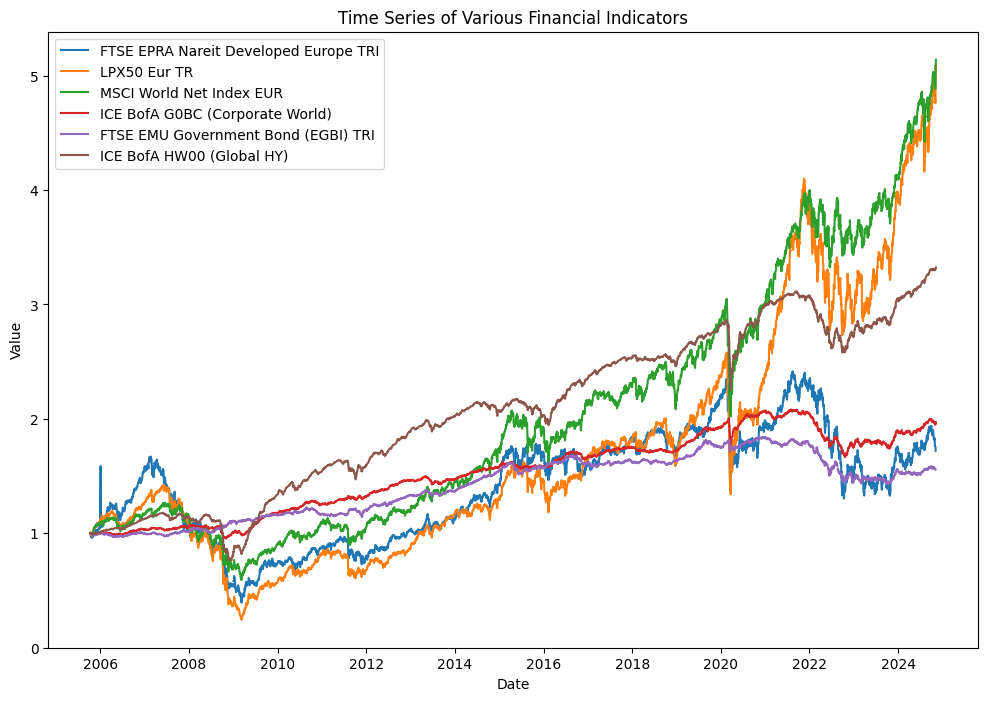

In [130]:
all_in_one_plot(normalized_df)

## We Have Made The Data --> Converting To Csv

In [131]:
normalized_df.to_csv('final_asset_classes.csv', index=True)